In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Data/insurance.csv')

Exploratory Data Analysis

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Number of rows and columns
data.shape

(1338, 7)

In [ ]:
#lisitng all types of all columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Summary of data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Displaying the numerical features

[features for features in data.dtypes[data.dtypes != 'object'].index]

['age', 'bmi', 'children', 'charges']

In [ ]:
num_features = data.dtypes[data.dtypes != 'object'].index

In [ ]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
#Now  displaying categorical features
[features for features in data.dtypes[data.dtypes == 'object'].index]

['sex', 'smoker', 'region']

In [ ]:
cat_features = data.dtypes[data.dtypes == 'object'].index

In [ ]:
data[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
#Cleaning the data
data = data.drop_duplicates()

In [ ]:
data.shape

(1337, 7)

We can see two rows were idententical so we droped one hence the number of rows changed from 1338 to 1337
And we dont need to look for null values as we already did and there were no null values

Visualizing The Data

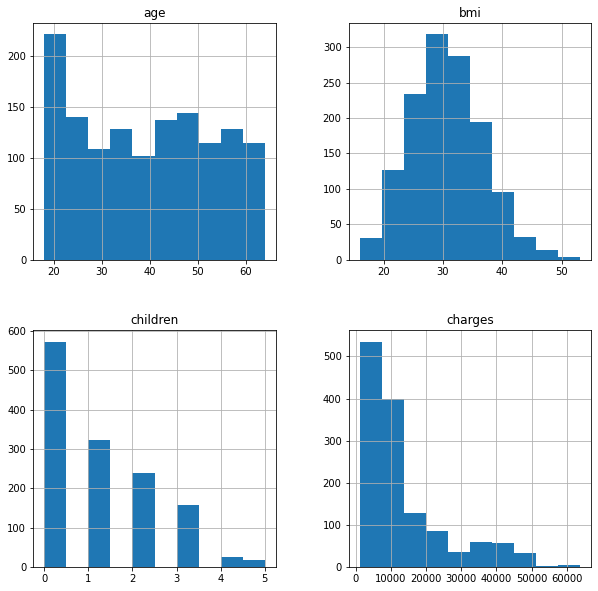

In [ ]:
#Histogram
data.hist(bins=10, figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc161181d90>,
      dtype=object)

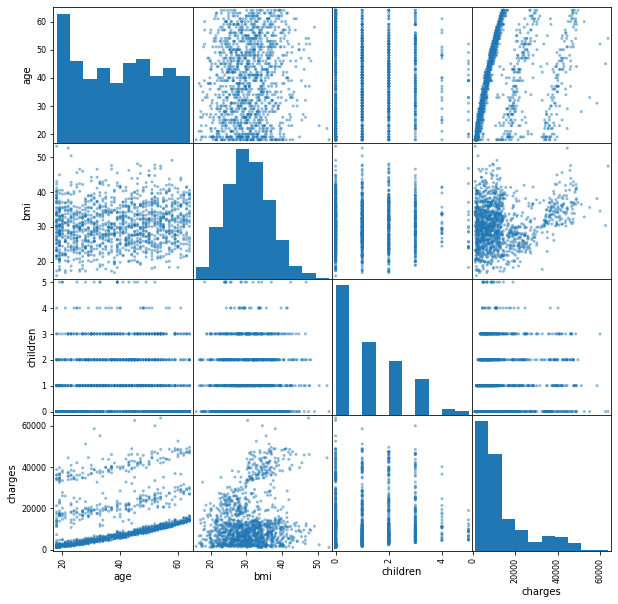

In [ ]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10,10))

Feature engineering

In [ ]:
#Applying get_dummies method
dummies = pd.get_dummies(data.sex)
dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
#Merging with original data
merge=pd.concat([data,dummies], axis=1)
merge.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [ ]:
#Romoving earlier columns
data2 = merge.drop(['sex','female'],axis=1)
data2.head()
#Thus we replaced categorical data with numerical data

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [ ]:
#Similarly for 'smoker' column
#Applying get dummies to smoker column
dummie2 = pd.get_dummies(data.smoker)
dummie2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
#Merging
merge2 = pd.concat([data2, dummie2], axis=1)
#Dropping
data3 = merge2.drop(['smoker', 'no'],axis=1)
data3.head()

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [ ]:
#Similarly for region
#Applying get dummies to region column
dummie3 = pd.get_dummies(data.region)
dummie3.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
#Merging
merge3 = pd.concat([data3, dummie3], axis=1)
#Dropping 'region' column
#Also droping one dummie region column among the 4 as they are dependent
data4 = merge3.drop(['region','southwest'],axis=1)
data4.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


Train Test Split

In [ ]:
#Target variable
y = data4['charges']

#Input variables or features
X = data4.drop('charges', axis=1)

In [ ]:
#Splitting data
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

Building Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)
y_pred = lr_model1.predict(X_test)

Evaluation metrics

In [ ]:
#Train Score
train_score = lr_model1.score(X_train, y_train)
print('Train Score :', train_score)

Train Score : 0.7529407473222741


In [ ]:
#Test Score
test_score = lr_model1.score(X_test, y_test)
print('Test Score :', test_score)

Test Score : 0.7404943835927522


In [ ]:
from sklearn import metrics
print("Mean absolute error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error :", metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error :" , np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean absolute error : 4369.963507193901
Mean squared error : 40796921.01723004
Root mean squared error : 66.10569950612353


In [ ]:
data5 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred, 'Variance':y_test-y_pred})
data5.head()

,Actual,Predicted,Variance
13,11090.71780,14570.628037,-3479.910237
1052,9288.02670,11134.391741,-1846.365041
172,1694.79640,-2162.368833,3857.165233
395,7526.70645,5635.850647,1890.855803
934,4673.39220,8414.178519,-3740.786319


In [ ]:
print('intercept :', model.intercept_)
print('Coefficients :', model.coef_)

intercept : -13066.66123401792
Coefficients : [  257.47853368   344.09640426   542.30890291  -153.16800854
 23946.3010032    931.06819138   179.63323342  -483.42743242]


Feature Selection

In [ ]:
#Using Backward Elimination method
#first we check how many features do we have
X.shape

(1337, 8)

In [ ]:
X.head()

,age,bmi,children,male,yes,northeast,northwest,southeast
0,19,27.900,0,0,1,0,0,0
1,18,33.770,1,1,0,0,0,1
2,28,33.000,3,1,0,0,0,1
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


In [ ]:
#Adding bias or Xo term
X1 = np.append(arr=np.ones((1337,1)).astype(int), values=X, axis=1)

In [ ]:
X1.shape

(1337, 9)

In [ ]:
#Creating a numpy array of dataframe X1 so that we can remove the columns easily later on and apply ols
X_new = X1[:,[0,1,2,3,4,5,6,7,8]]

Training the Linear Model

In [ ]:
#Using ols i.e. Ordinary Least Square Method
import statsmodels.api as sm
ols= sm.OLS(endog=y, exog=X_new).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:21:47   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.29e+04   1021.381    -12.627      0.000   -1.49e+04   -1.09e+04
x1           256.7646     11.912     21.555      0.000     233.396     280.133
x2           339.2504     28.611     11.857      0.000     283.122     395.379
x3           474.8205    137.897      3.443      0.001     204.301     745.340
x4          -129.4815    333.195     -0.389      0.698    -783.128     524.165
x5          2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
x6           960.0814    478.106      2.008      0.045      22.156    1898.007
x7           610.8549    477.758      1.279      0.201    -326.387    1548.097
x8           -75.1842    470.810     -0.160      0.873    -998.797     848.428
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Variables X4, X6, X7 and X8 have p value>0.05
#Hence we drop corresponding columns from X_new by updating X_new
X_new = X1[:, [0,1,2,3,5,6]]
X_new.shape

(1337, 6)

In [ ]:
#Again applying ols for chechking
ols= sm.OLS(endog=y, exog=X_new).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     799.7
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:29:55   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.251e+04    964.109    -12.974      0.000   -1.44e+04   -1.06e+04
x1           257.3437     11.899     21.628      0.000     234.001     280.686
x2           329.4707     27.627     11.926      0.000     275.274     383.667
x3           479.0778    137.763      3.478      0.001     208.822     749.334
x4          2.381e+04    410.968     57.930      0.000     2.3e+04    2.46e+04
x5           773.1321    390.900      1.978      0.048       6.285    1539.979
==============================================================================
Omnibus:                      301.497   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.395
Skew:                           1.214   Prob(JB):                    3.04e-158
Kurtosis:                       5.669   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Now we have all variables' p values<0.05 but x5 has still significant p pvalue
#Updating X_new again
X_new = X1[:,[0,1,2,3,5]]
ols= sm.OLS(endog=y, exog=X_new).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:43:31   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.630    -12.835      0.000   -1.39e+04   -1.02e+04
x1           257.7728     11.910     21.644      0.000     234.409     281.137
x2           321.8708     27.388     11.752      0.000     268.143     375.599
x3           472.9751    137.879      3.430      0.001     202.492     743.458
x4          2.381e+04    411.414     57.875      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      300.944   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.880
Skew:                           1.215   Prob(JB):                    4.79e-157
Kurtosis:                       5.650   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

#Hence we train the model again after backward elimination

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size = 0.20, random_state = 0)
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)
y_pred_new = lr_model2.predict(X_test2)


Evaluation metrics for new model (after back elimination)

In [ ]:
#Train Score
train_score_2 = lr_model2.score(X_train2, y_train2)
print('New train score:', train_score_2)

New train score: 0.7474999066916996


In [ ]:
#Test Score
test_score2 = lr_model2.score(X_test2, y_test2)
print('New Test Score:', test_score2)

New Test Score: 0.7525301553132632
